# Wine Quality Prediction Using Various Models
***


# Red Wines

In [95]:
#import relevant libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# load and investigate the data here:
reds = pd.read_csv('winequality-red.csv', sep=';')

# See the number of rows and columns as well as data types of the columns
print("Rows, columns: " + str(reds.shape) +'\n')
print(reds.dtypes)

Rows, columns: (1599, 12)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [96]:
# Check for missing values
print(reds.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<AxesSubplot:xlabel='quality', ylabel='Count'>

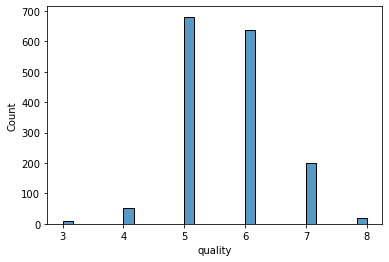

In [97]:
# What is wine quality distribution?
sns.histplot(reds['quality'])

<AxesSubplot:>

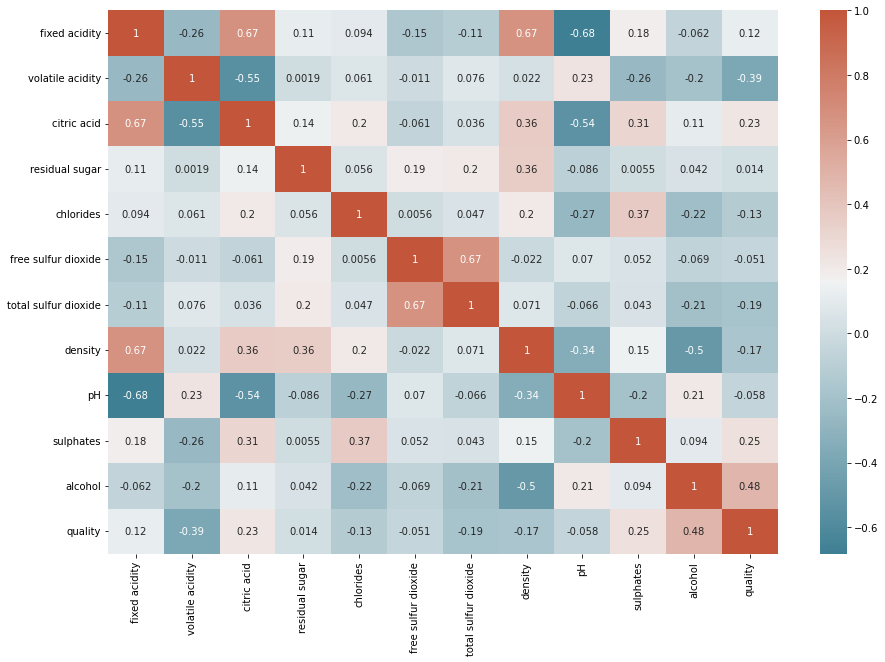

In [98]:
# How do the variables correlate to quality?
corr = reds.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [99]:
# I want to make a model that says if a wine is good or not
# Need to convert 'quality' number into a True/False category
# Let's say any wine with quality >= 7 is "good"

# Create Classification columnof target variable
reds['goodquality'] = [1 if x >= 7 else 0 for x in reds['quality']]

# Separate feature variables and target prediction variable
X = reds.drop(['quality','goodquality'], axis = 1)
y = reds['goodquality']

In [100]:
# What are the counts and ratios of bad:good wine?
print(reds['goodquality'].value_counts())
print(reds['goodquality'].value_counts(normalize=True))

0    1382
1     217
Name: goodquality, dtype: int64
0    0.86429
1    0.13571
Name: goodquality, dtype: float64


In [101]:
# Standardize the data by normalizing feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [107]:
# Splitting the data into 80%/20% 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

## Decision Tree Classifier

In [108]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(random_state=1)
model_DT.fit(X_train, y_train)
y_pred_DT = model_DT.predict(X_test)
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       290
           1       0.48      0.77      0.59        30

    accuracy                           0.90       320
   macro avg       0.73      0.84      0.77       320
weighted avg       0.93      0.90      0.91       320



## Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(random_state=1)
model_RFC.fit(X_train, y_train)
y_pred_RFC = model_RFC.predict(X_test)
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       290
           1       0.67      0.60      0.63        30

    accuracy                           0.93       320
   macro avg       0.81      0.78      0.80       320
weighted avg       0.93      0.93      0.93       320



## AdaBoost Classifier 

In [111]:
from sklearn.ensemble import AdaBoostClassifier

model_ABC = AdaBoostClassifier(random_state=1)
model_ABC.fit(X_train, y_train)
y_pred_ABC = model_ABC.predict(X_test)
print(classification_report(y_test, y_pred_ABC))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       290
           1       0.52      0.43      0.47        30

    accuracy                           0.91       320
   macro avg       0.73      0.70      0.71       320
weighted avg       0.90      0.91      0.91       320



## Gradient Boost Classifier

In [112]:
from sklearn.ensemble import GradientBoostingClassifier

model_GBC = GradientBoostingClassifier(random_state=1)
model_GBC.fit(X_train, y_train)
y_pred_GBC = model_GBC.predict(X_test)
print(classification_report(y_test, y_pred_GBC))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       290
           1       0.53      0.57      0.55        30

    accuracy                           0.91       320
   macro avg       0.74      0.76      0.75       320
weighted avg       0.92      0.91      0.91       320



## XGBoost Classifier

In [116]:
import xgboost as xgb

model_XGB = xgb.XGBClassifier(random_state=1)
model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)
print(classification_report(y_test, y_pred_XGB))

[15:15:58] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       290
           1       0.52      0.77      0.62        30

    accuracy                           0.91       320
   macro avg       0.75      0.85      0.79       320
weighted avg       0.93      0.91      0.92       320



### Observations
From the f1 weighted average, it seems like Random Forest Classifier and XGBoost Classifier are the top performers. Although the others aren't far off. Let's see what variables have the most importance in these models and look at the wines to find any trends.

Text(0.5, 1.0, 'Random Forest Classifier Feature Importances')

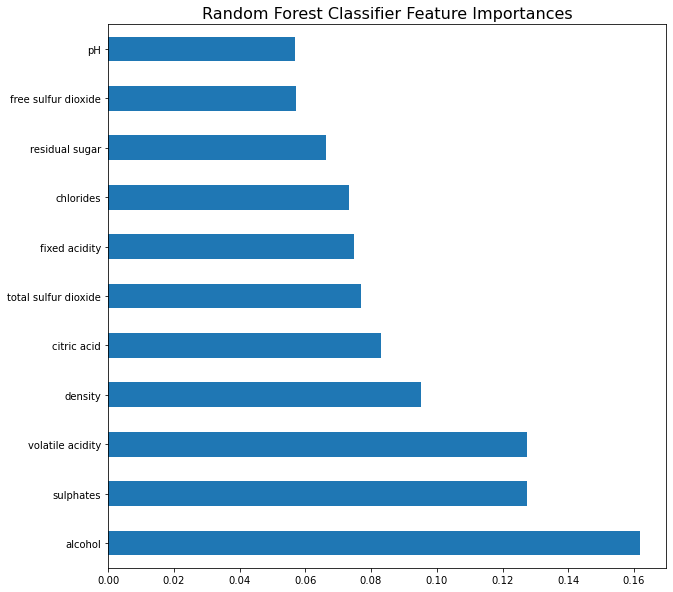

In [118]:
feat_importances = pd.Series(model_RFC.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))
plt.title('Random Forest Classifier Feature Importances', fontsize = '16')

Text(0.5, 1.0, 'XGBoost Feature Importances')

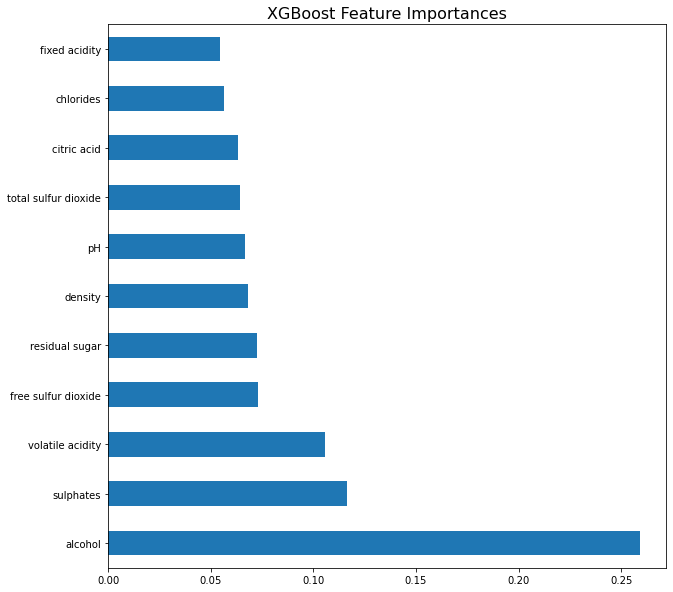

In [119]:
feat_importances = pd.Series(model_XGB.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))
plt.title('XGBoost Feature Importances', fontsize = '16')

### Observations
It looks like the top 3 variables are the same for each model. It's interesting that alcohol percentage is so important to the XGBoost Classifier, with the other variables being more equal. It seems like the Random Forest Classifier had a bit more of distribution. Let's look at the actual wines to see what trends there are

In [121]:
# Filtering df for only good quality
reds_good = reds[reds['goodquality']==1]
reds_good.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.276443,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,7.000000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,7.000000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1.0


In [122]:
# Filtering df for only bad quality
reds_bad = reds[reds['goodquality']==0]
reds_bad.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.601719,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,5.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,6.000000,0.0


# Conclusions
- `Alcohol`, `sulphates`, and `volatile acidity` are the top variables that determine the wine quality
- Average `alcohol` percentage is higher on wines classified as Good Quality: 11.52% vs 10.25%
- Average `sulphates` are higher in good quality wines: .74 vs .64
- Average `volatile acidity` is lower in good quality wines: .41 vs .55
- `Reisdual sugar` is also higher on averagee in good quality red wines

***
# White Wines

In [123]:
# load and investigate the data here:
whites = pd.read_csv('winequality-white.csv', sep=';')

# See the number of rows and columns as well as data types of the columns
print("Rows, columns: " + str(whites.shape) +'\n')
print(whites.dtypes)

Rows, columns: (4898, 12)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [124]:
# Check for missing values
print(whites.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<AxesSubplot:xlabel='quality', ylabel='Count'>

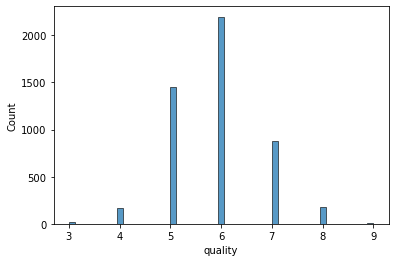

In [125]:
# What is wine quality distribution?
sns.histplot(whites['quality'])

<AxesSubplot:>

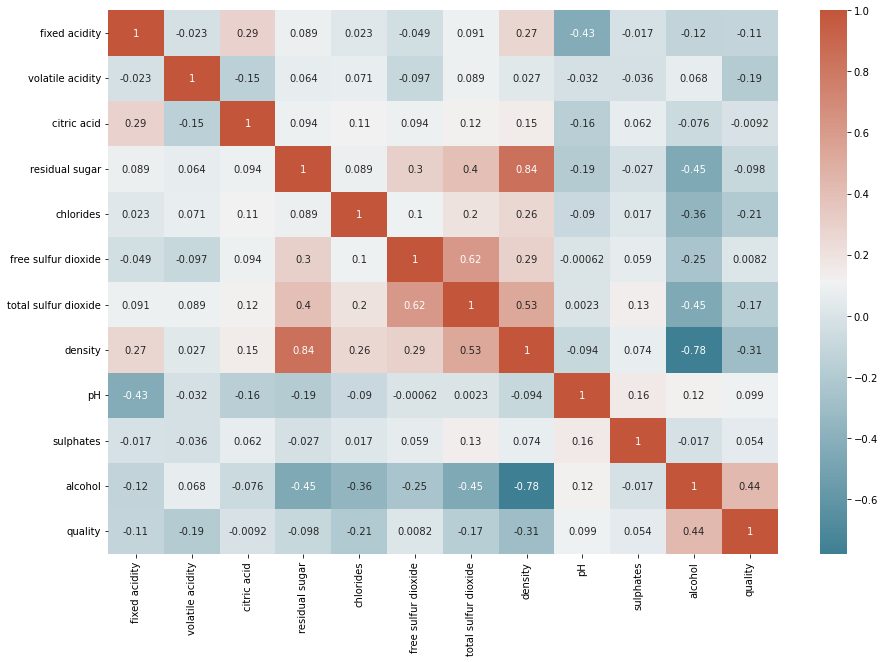

In [127]:
# How do the variables correlate to quality?
corr = whites.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [128]:
# Same as before with reds, I want to make a model that says if a wine is good or not
# Need to convert 'quality' number into a True/False category
# Let's say any wine with quality >= 7 is "good"

# Create Classification columnof target variable
whites['goodquality'] = [1 if x >= 7 else 0 for x in whites['quality']]

# Separate feature variables and target prediction variable
X = whites.drop(['quality','goodquality'], axis = 1)
y = whites['goodquality']

In [129]:
# What are the counts and ratios of bad:good wine?
print(whites['goodquality'].value_counts())
print(whites['goodquality'].value_counts(normalize=True))

0    3838
1    1060
Name: goodquality, dtype: int64
0    0.783585
1    0.216415
Name: goodquality, dtype: float64


In [130]:
# Standardize the data by normalizing feature variables
X_features = X
X = StandardScaler().fit_transform(X)

In [131]:
# Splitting the data into 80%/20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

## Decision Tree Classifier


In [132]:
model_DT = DecisionTreeClassifier(random_state=1)
model_DT.fit(X_train, y_train)
y_pred_DT = model_DT.predict(X_test)
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       764
           1       0.58      0.56      0.57       216

    accuracy                           0.81       980
   macro avg       0.73      0.72      0.72       980
weighted avg       0.81      0.81      0.81       980



## Random Forest Classifier

In [134]:
model_RFC = RandomForestClassifier(random_state=1)
model_RFC.fit(X_train, y_train)
y_pred_RFC = model_RFC.predict(X_test)
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       764
           1       0.81      0.55      0.65       216

    accuracy                           0.87       980
   macro avg       0.85      0.75      0.79       980
weighted avg       0.87      0.87      0.86       980



## AdaBoost Classifier

In [135]:
model_ABC = AdaBoostClassifier(random_state=1)
model_ABC.fit(X_train, y_train)
y_pred_ABC = model_ABC.predict(X_test)
print(classification_report(y_test, y_pred_ABC))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       764
           1       0.55      0.31      0.39       216

    accuracy                           0.79       980
   macro avg       0.69      0.62      0.63       980
weighted avg       0.76      0.79      0.77       980



## Gradient Boost Classifier

In [139]:
model_GBC = GradientBoostingClassifier(random_state=1)
model_GBC.fit(X_train, y_train)
y_pred_GBC = model_GBC.predict(X_test)
print(classification_report(y_test, y_pred_GBC))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       764
           1       0.71      0.40      0.51       216

    accuracy                           0.83       980
   macro avg       0.78      0.68      0.70       980
weighted avg       0.82      0.83      0.81       980



## XGBoost Classifier

In [140]:
model_XGB = xgb.XGBClassifier(random_state=1)
model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)
print(classification_report(y_test, y_pred_XGB))

/Users/nicknut/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:02:52] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       764
           1       0.74      0.61      0.67       216

    accuracy                           0.87       980
   macro avg       0.82      0.77      0.79       980
weighted avg       0.86      0.87      0.86       980



### Observations
From the f1 weighted average, it seems like Random Forest Classifier and XGBoost Classifier are the top performers, samee as with red wine. Unlike with red wine, the other models performed significantly worse. Let's see what variables have the most importance in these models and look at the wines to find any trends.

Text(0.5, 1.0, 'Random Forest Classifier Feature Importances')

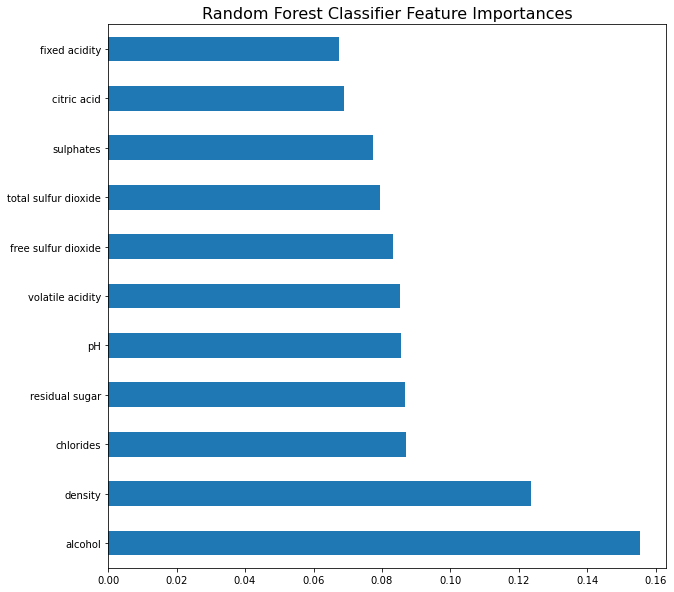

In [141]:
feat_importances = pd.Series(model_RFC.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))
plt.title('Random Forest Classifier Feature Importances', fontsize = '16')

Text(0.5, 1.0, 'XGBoost Feature Importances')

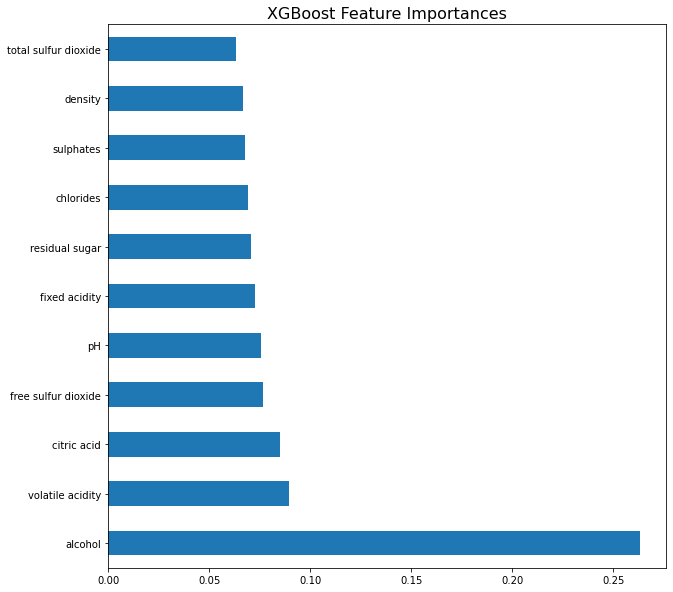

In [142]:
feat_importances = pd.Series(model_XGB.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))
plt.title('XGBoost Feature Importances', fontsize = '16')

### Observations
It looks like the top 3 variables are the different for each model, although they both share `alcohol` as the top variable. Same as with red wines, `alcohol` percentage is important to the XGBoost Classifier, with the other variables being more equal. Interestingly, the `density` is important to the Random Forest, where it is not as important to XGBoost. Vice Versa with `volatile acidity` It seems like the Random Forest Classifier had a bit more of distribution. Let's look at the actual wines to see what trends there are

In [143]:
# Filtering df for only good quality
whites_good = whites[whites['goodquality']==1]
whites_good.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.0
mean,6.725142,0.265349,0.326057,5.261509,0.038160,34.550472,125.245283,0.992412,3.215132,0.500142,11.416022,7.174528,1.0
std,0.768798,0.094097,0.080288,4.290845,0.011145,13.797146,32.724848,0.002772,0.157185,0.133044,1.255209,0.391978,0.0
min,3.900000,0.080000,0.010000,0.800000,0.012000,5.000000,34.000000,0.987110,2.840000,0.220000,8.500000,7.000000,1.0
25%,6.200000,0.190000,0.280000,1.800000,0.031000,25.000000,101.000000,0.990500,3.100000,0.400000,10.700000,7.000000,1.0
50%,6.700000,0.250000,0.310000,3.875000,0.037000,33.000000,122.000000,0.991730,3.200000,0.480000,11.500000,7.000000,1.0
75%,7.200000,0.320000,0.360000,7.400000,0.044000,42.000000,146.000000,0.993605,3.320000,0.580000,12.400000,7.000000,1.0
max,9.200000,0.760000,0.740000,19.250000,0.135000,108.000000,229.000000,1.000600,3.820000,1.080000,14.200000,9.000000,1.0


In [144]:
# Filtering df for only bad quality
whites_bad = whites[whites['goodquality']==0]
whites_bad.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.0
mean,6.890594,0.281802,0.336438,6.703478,0.047875,35.517327,141.982934,0.994474,3.180847,0.487004,10.265215,5.519802,0.0
std,0.860108,0.102293,0.129959,5.225048,0.023548,17.787825,44.145402,0.002894,0.148414,0.108167,1.100576,0.604905,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987220,2.720000,0.230000,8.000000,3.000000,0.0
25%,6.300000,0.220000,0.260000,1.700000,0.037000,23.000000,111.000000,0.992320,3.080000,0.410000,9.400000,5.000000,0.0
50%,6.800000,0.270000,0.320000,6.000000,0.045000,34.000000,140.000000,0.994380,3.170000,0.470000,10.000000,6.000000,0.0
75%,7.400000,0.320000,0.400000,10.400000,0.051000,47.000000,173.000000,0.996570,3.267500,0.540000,11.000000,6.000000,0.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.810000,1.060000,14.000000,6.000000,0.0


# Conclusions
- `Alcohol` is the top variable in common that determine the wine quality
- Average `alcohol` percentage is higher on wines classified as Good Quality: 11.42% vs 10.27%
- Average `density` is similar in both groups
- Average `volatile acidity` is lower in good quality wines: .27 vs .28
- `Ressidual sugar` is also lower on average in good quality white wines